## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Sri_Harshitha\Downloads\Tasks\prime.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic EDA

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
print(df["type"].nunique())
print(df["type"].unique())

2
['Movie' 'TV Show']


In [9]:
df[df["type"]=="Movie"].isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [10]:
df[df["type"]=="TV Show"].isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
df=df.drop(["show_id","date_added"],axis=1)

In [12]:
df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [13]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df.fillna("Unknown",inplace=True)

In [15]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## TYPE

<AxesSubplot:xlabel='type', ylabel='count'>

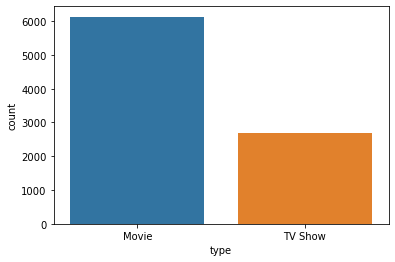

In [16]:
sns.countplot(df["type"])

In [17]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Movie and TV show since 2000')

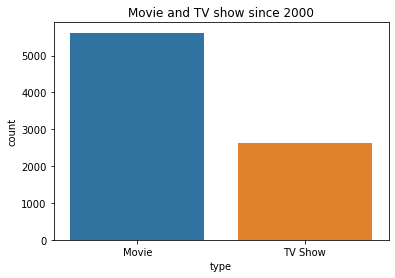

In [18]:
sns.countplot(data=df[df["release_year"] > 2000], x="type")
plt.title("Movie and TV show since 2000")

Text(0.5, 1.0, 'Movie and TV show from 1925 till 2000')

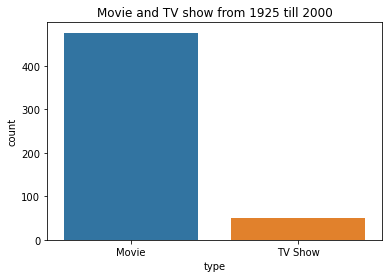

In [19]:
sns.countplot(data=df[df["release_year"] < 2000], x="type")
plt.title("Movie and TV show from 1925 till 2000")

In [20]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown', 'TV-Y7-FV', 'UR'], dtype=object)

In [21]:
df.groupby("type")["director"].nunique()

type
Movie      4355
TV Show     223
Name: director, dtype: int64

Text(0, 0.5, 'Count')

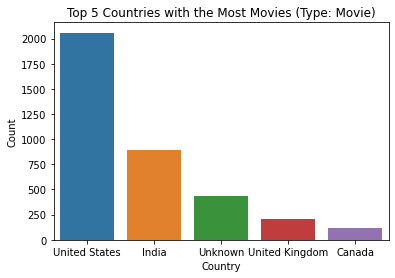

In [22]:
sns.barplot(x=df[df["type"] == "Movie"]["country"].value_counts().head(5).index, y=df[df["type"] == "Movie"]["country"].value_counts().head(5))
plt.title("Top 5 Countries with the Most Movies (Type: Movie)")
plt.xlabel("Country")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

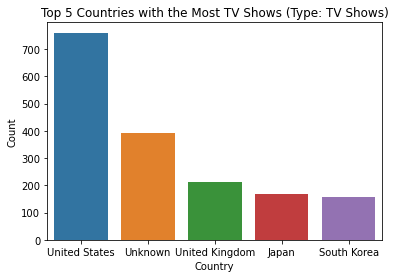

In [23]:
sns.barplot(x=df[df["type"] == "TV Show"]["country"].value_counts().head(5).index, y=df[df["type"] == "TV Show"]["country"].value_counts().head(5))
plt.title("Top 5 Countries with the Most TV Shows (Type: TV Shows)")
plt.xlabel("Country")
plt.ylabel("Count")

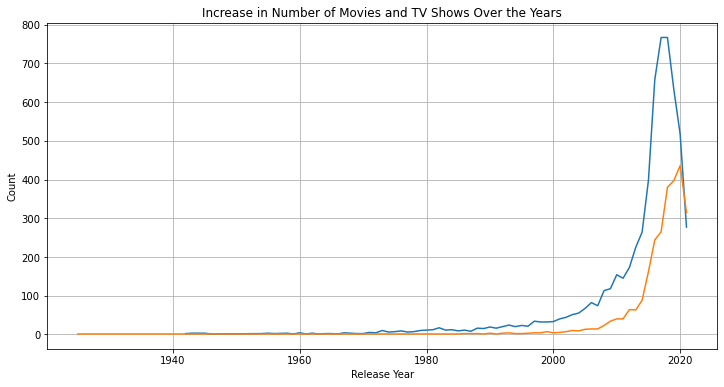

In [24]:
movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]
# Group and count movies and TV shows by release year
movies_count = movies["release_year"].value_counts().sort_index()
tv_shows_count = tv_shows["release_year"].value_counts().sort_index()
# Create a line plot to visualize the increase over the years
plt.figure(figsize=(12, 6))
plt.plot(movies_count.index, movies_count, label="Movies")
plt.plot(tv_shows_count.index, tv_shows_count, label="TV Shows")
# Add title and labels
plt.title("Increase in Number of Movies and TV Shows Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.grid(True)

1. 'PG-13': Parental Guidance - 13 and older.It may contain some material parents might not like for children under 13.

2. 'TV-MA': Mature Audience - Intended for adults and may not be suitable for those under 17.

3. 'PG': Parental Guidance - Some material may not be suitable for children.

4. 'TV-14': Parents Strongly Cautioned - May be unsuitable for children under 14.

5. 'TV-PG': Parental Guidance Suggested - Some material may not be suitable for children.

6. 'TV-Y': All Children - Intended for children of all ages.

7. 'TV-Y7': Directed to Older Children - Suitable for children 7 and older.

8. 'R': Restricted - Restricted to viewers over 17 or 18. Parents are urged to learn more about the movie before taking their children to see it.

9. 'TV-G': General Audience - Suitable for all ages.

10. 'G': General Audience - Suitable for all ages.

11. 'NC-17': Adults Only - No one 17 and under admitted.

12. '74 min', '84 min', '66 min': These are not content ratings but rather the durations of content, typically in minutes.

13. 'NR': Not Rated - The content hasn't been rated or the rating is not available.

14. 'Unknown': This is used to indicate that the rating information is missing or unknown.

15. 'TV-Y7-FV': Directed to Older Children - Fantasy Violence - Suitable for children 7 and older with elements of fantasy violence.

16. 'UR': Unrated - Similar to "NR," it means the content hasn't been rated or the rating is unavailable.


Text(0, 0.5, 'Count')

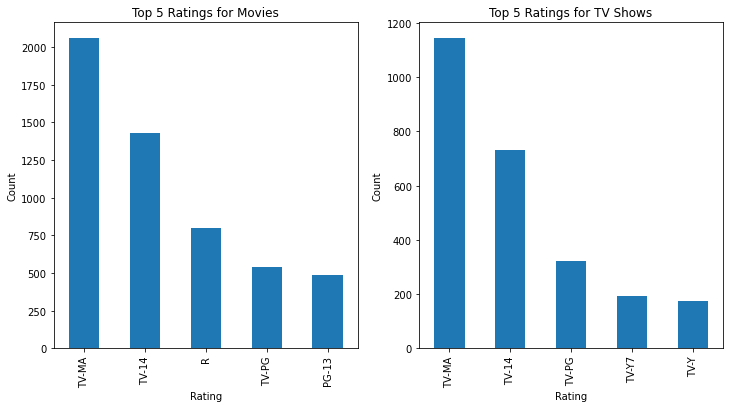

In [25]:
# Filter the DataFrame into two separate DataFrames for movies and TV shows
movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]
top_movie_ratings = movies["rating"].value_counts().nlargest(5)
top_tv_show_ratings = tv_shows["rating"].value_counts().nlargest(5)

# Create a bar chart for top 5 ratings of movies and TV shows
plt.figure(figsize=(12, 6))  
# Create a subplot for movies
plt.subplot(1, 2, 1)
top_movie_ratings.plot(kind="bar")
plt.title("Top 5 Ratings for Movies")
plt.xlabel("Rating")
plt.ylabel("Count")

# Create a subplot for TV shows
plt.subplot(1, 2, 2)
top_tv_show_ratings.plot(kind="bar")
plt.title("Top 5 Ratings for TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")


In [26]:
df["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: duration, Length: 221, dtype: int64

## Director

In [27]:
df["director"].value_counts(ascending=False)

Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

## Country

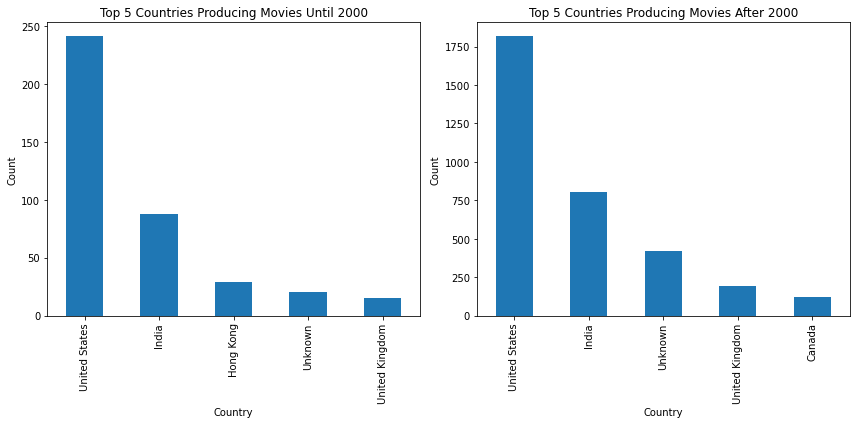

In [28]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Filter the DataFrame for movies released until 2000
movies_until_2000 = df[(df["type"] == "Movie") & (df["release_year"] <= 2000)]
# Filter the DataFrame for movies released after 2000
movies_after_2000 = df[(df["type"] == "Movie") & (df["release_year"] > 2000)]
# Group and count the top 5 countries for movies released until 2000
top_5_countries_until_2000 = movies_until_2000["country"].value_counts().nlargest(5)
top_5_countries_after_2000 = movies_after_2000["country"].value_counts().nlargest(5)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_5_countries_until_2000.plot(kind="bar")
plt.title("Top 5 Countries Producing Movies Until 2000")
plt.xlabel("Country")
plt.ylabel("Count")
# Bar chart for movies released after 2000
plt.subplot(1, 2, 2)
top_5_countries_after_2000.plot(kind="bar")
plt.title("Top 5 Countries Producing Movies After 2000")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()


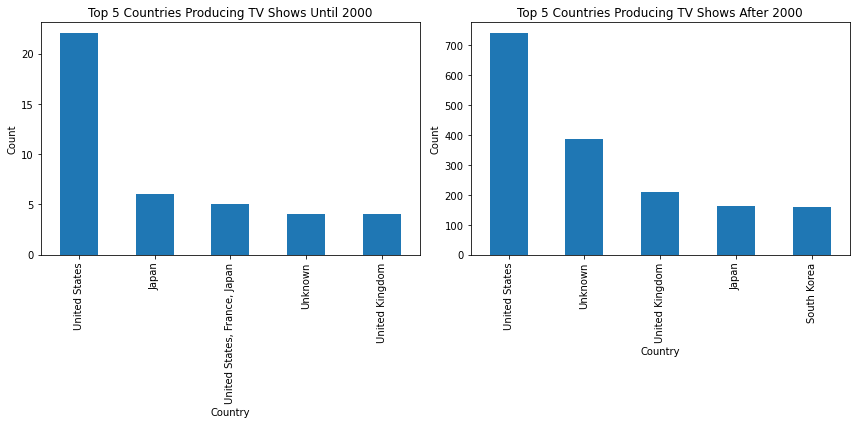

In [29]:
# Filter the DataFrame for TV shows released until 2000
tv_shows_until_2000 = df[(df["type"] == "TV Show") & (df["release_year"] <= 2000)]
# Filter the DataFrame for TV shows released after 2000
tv_shows_after_2000 = df[(df["type"] == "TV Show") & (df["release_year"] > 2000)]
# Group and count the top 5 countries for TV shows released until 2000
top_5_countries_tv_until_2000 = tv_shows_until_2000["country"].value_counts().nlargest(5)
# Group and count the top 5 countries for TV shows released after 2000
top_5_countries_tv_after_2000 = tv_shows_after_2000["country"].value_counts().nlargest(5)
plt.figure(figsize=(12, 6))
# Bar chart for TV shows released until 2000
plt.subplot(1, 2, 1)
top_5_countries_tv_until_2000.plot(kind="bar")
plt.title("Top 5 Countries Producing TV Shows Until 2000")
plt.xlabel("Country")
plt.ylabel("Count")
# Bar chart for TV shows released after 2000
plt.subplot(1, 2, 2)
top_5_countries_tv_after_2000.plot(kind="bar")
plt.title("Top 5 Countries Producing TV Shows After 2000")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()


## Ratings

Text(0, 0.5, 'Count')

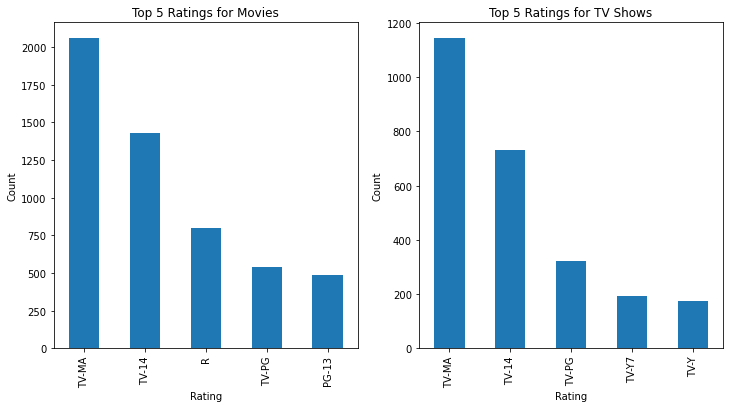

In [30]:
# Filter the DataFrame into two separate DataFrames for movies and TV shows
movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]
top_movie_ratings = movies["rating"].value_counts().nlargest(5)
top_tv_show_ratings = tv_shows["rating"].value_counts().nlargest(5)

# Create a bar chart for top 5 ratings of movies and TV shows
plt.figure(figsize=(12, 6))  
# Create a subplot for movies
plt.subplot(1, 2, 1)
top_movie_ratings.plot(kind="bar")
plt.title("Top 5 Ratings for Movies")
plt.xlabel("Rating")
plt.ylabel("Count")

# Create a subplot for TV shows
plt.subplot(1, 2, 2)
top_tv_show_ratings.plot(kind="bar")
plt.title("Top 5 Ratings for TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")


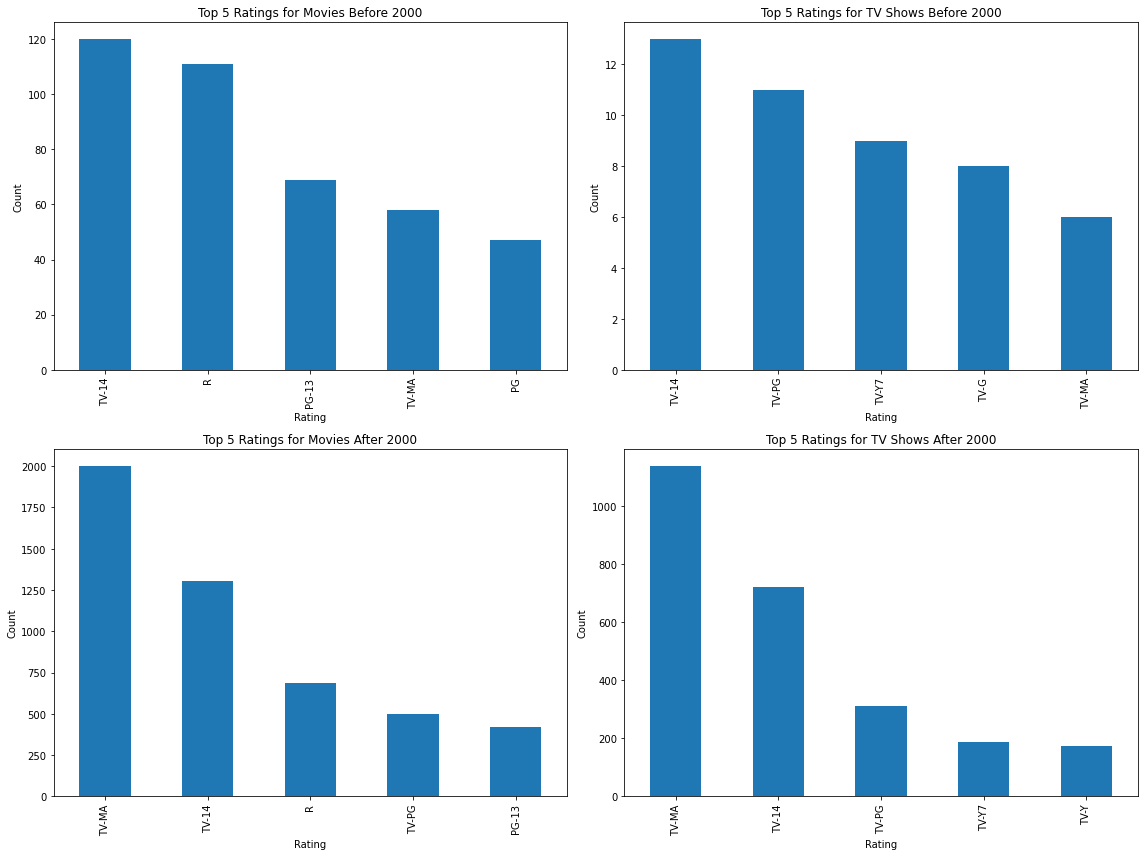

In [31]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
movies_before_2000 = df[(df["type"] == "Movie") & (df["release_year"] < 2000)]
tv_shows_before_2000 = df[(df["type"] == "TV Show") & (df["release_year"] < 2000)]
movies_after_2000 = df[(df["type"] == "Movie") & (df["release_year"] >= 2000)]
tv_shows_after_2000 = df[(df["type"] == "TV Show") & (df["release_year"] >= 2000)]
top_movie_ratings_before_2000 = movies_before_2000["rating"].value_counts().nlargest(5)
top_tv_show_ratings_before_2000 = tv_shows_before_2000["rating"].value_counts().nlargest(5)
top_movie_ratings_after_2000 = movies_after_2000["rating"].value_counts().nlargest(5)
top_tv_show_ratings_after_2000 = tv_shows_after_2000["rating"].value_counts().nlargest(5)
plt.figure(figsize=(16, 12))

# Bar chart for top 5 ratings of movies before 2000
plt.subplot(2, 2, 1)
top_movie_ratings_before_2000.plot(kind="bar")
plt.title("Top 5 Ratings for Movies Before 2000")
plt.xlabel("Rating")
plt.ylabel("Count")

# Bar chart for top 5 ratings of TV shows before 2000
plt.subplot(2, 2, 2)
top_tv_show_ratings_before_2000.plot(kind="bar")
plt.title("Top 5 Ratings for TV Shows Before 2000")
plt.xlabel("Rating")
plt.ylabel("Count")

# Bar chart for top 5 ratings of movies after 2000
plt.subplot(2, 2, 3)
top_movie_ratings_after_2000.plot(kind="bar")
plt.title("Top 5 Ratings for Movies After 2000")
plt.xlabel("Rating")
plt.ylabel("Count")

# Bar chart for top 5 ratings of TV shows after 2000
plt.subplot(2, 2, 4)
top_tv_show_ratings_after_2000.plot(kind="bar")
plt.title("Top 5 Ratings for TV Shows After 2000")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
